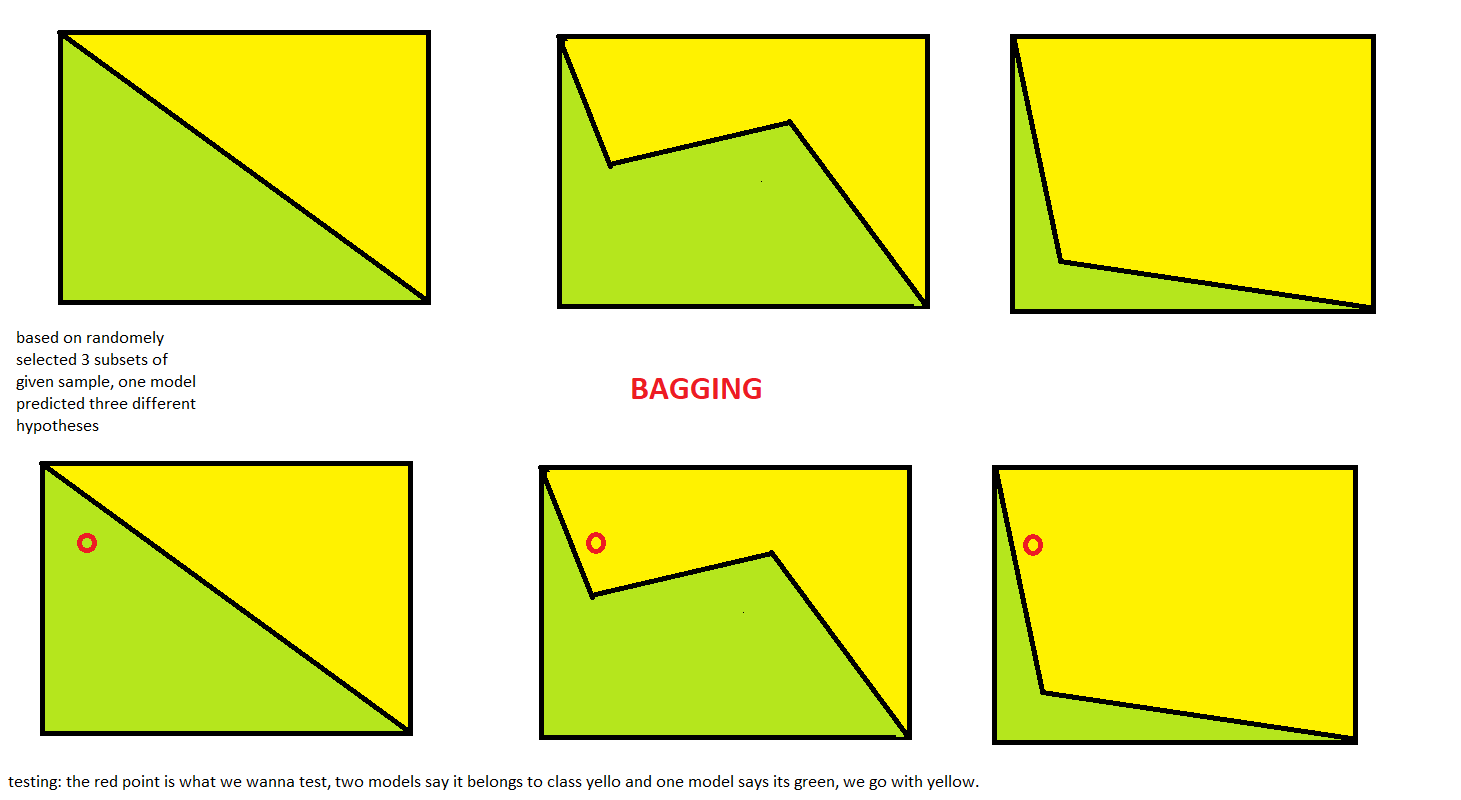

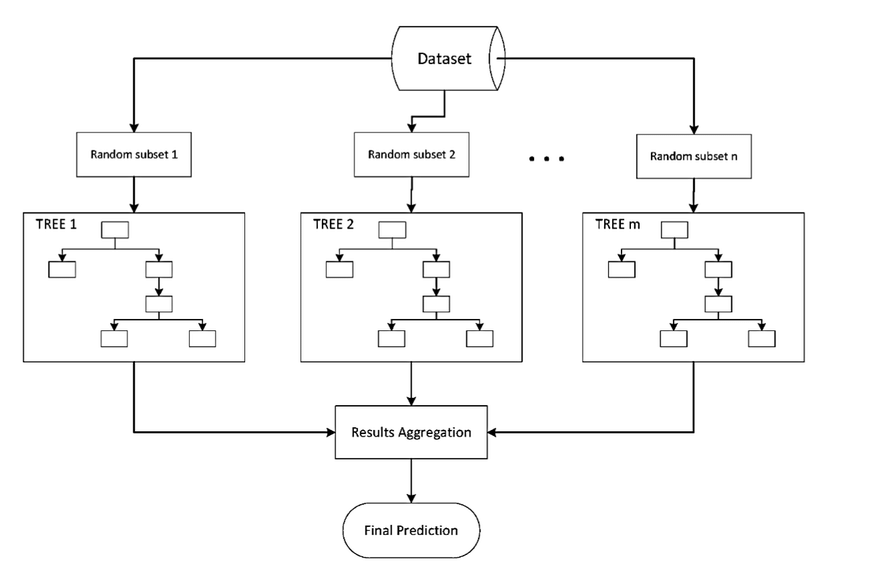

# Importing

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier

# get data

In [3]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
Y = iris.target

# decide number of samples which shoul come outta the main sample

* base model = DecisionTreeClassifier (you can change this)

* number of trees = 100

In [5]:
no_trees= 1000
b_model = DecisionTreeClassifier()

In [6]:
enseble_model = BaggingClassifier(base_estimator=b_model,n_estimators=no_trees,random_state=0)
print(enseble_model)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=9,
                  random_state=0)


# calculate performance

* kfold is used for testing the same bagging classifier on different random samples generated from the data for some n number of times 

In [7]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=9,random_state=0)

In [12]:
from sklearn import model_selection
predicted_results = model_selection.cross_val_score(enseble_model,X,Y,cv = kfold)
print("kfold score results: \n",predicted_results)
print("mean score: \n",predicted_results.mean())

kfold score results: 
 [1.         1.         1.         1.         0.70588235 1.
 0.9375     0.875      1.        ]
mean score: 
 0.9464869281045752


* the kfold run this model 9 times, and it got 9 accuracies, you gotta take mean of that

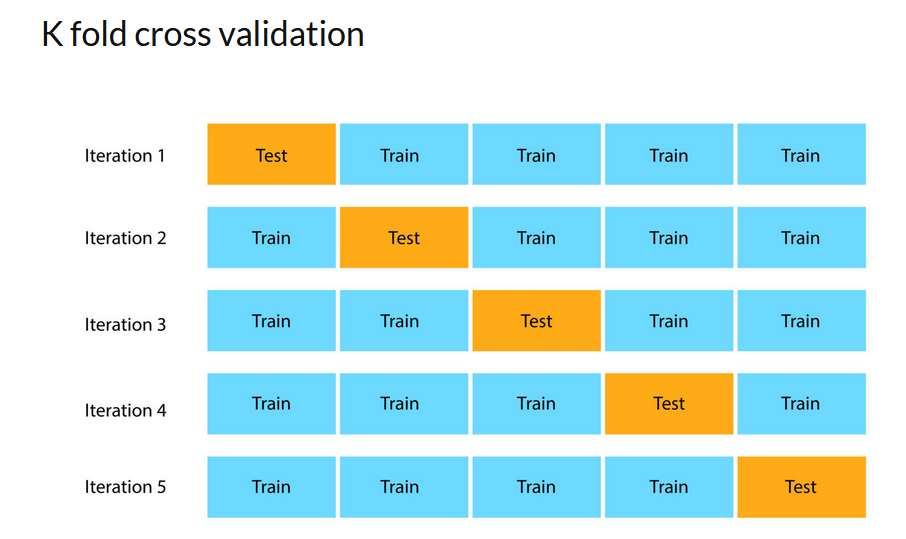

# A normal run, without kfold

In [17]:
# build model
bagg = BaggingClassifier(base_estimator=enseble_model,n_estimators=no_trees)
# split data
xtr,xte,ytr,yte = train_test_split(X,Y,test_size=0.30,random_state=0)
# fit data
bagg.fit(xtr,ytr)
# predict
res = bagg.predict(xte)
print("predictions: \n",res)
# metrics
from sklearn import metrics
accuracyscore = metrics.accuracy_score(yte,res)
print("score: ",accuracyscore)

predictions: 
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]
score:  0.9777777777777777
